C:\Users\bikra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\bikra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\bikra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Test Marks: 58
Predicted Class: Pass
Predicted Probability of Passing: 0.98

Accuracy: 100.00%
Confusion Matrix:
[[4 0]
 [0 8]]


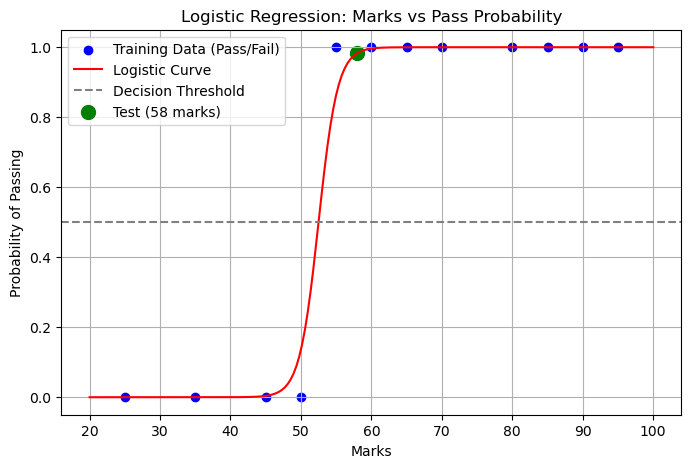

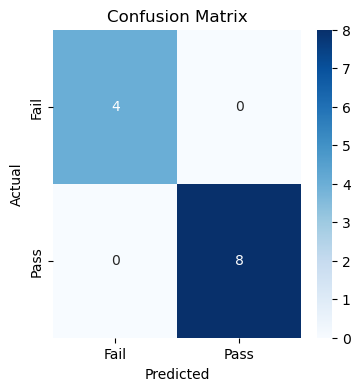

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create dataset
# Marks < 50 = Fail (0), Marks >= 50 = Pass (1)
data = pd.DataFrame({
    'Marks': [25, 35, 45, 50, 55, 60, 65, 70, 80, 85, 90, 95],
    'Result': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
})

# Step 2: Features and labels
X = data[['Marks']]  # Feature matrix
y = data['Result']   # Labels

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 4: Model predictions on training data
y_pred = model.predict(X)

# Step 5: Predict on a test case (e.g., 58 marks)
test_marks = [[58]]
test_pred = model.predict(test_marks)
test_prob = model.predict_proba(test_marks)[0][1]  # Probability of passing

print(f"Test Marks: 58")
print(f"Predicted Class: {'Pass' if test_pred[0] == 1 else 'Fail'}")
print(f"Predicted Probability of Passing: {test_prob:.2f}")

# Step 6: Evaluate model
acc = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
print(f"\nAccuracy: {acc*100:.2f}%")
print("Confusion Matrix:")
print(cm)

# Step 7: Plot logistic curve with test point
x_vals = np.linspace(20, 100, 200).reshape(-1, 1)
y_probs = model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Training Data (Pass/Fail)')
plt.plot(x_vals, y_probs, color='red', label='Logistic Curve')
plt.axhline(0.5, linestyle='--', color='gray', label='Decision Threshold')
plt.scatter(test_marks, test_prob, color='green', s=100, label='Test (58 marks)')
plt.title('Logistic Regression: Marks vs Pass Probability')
plt.xlabel('Marks')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(True)
# plt.savefig('logistic_pass_fail.png')
plt.show()

# Step 8: Plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig('confusion_matrix.png')
plt.show()